# Dimension Reduction Using SVD and PCA

## Part 1. SVD Image Compression

<h3>What is Singular Value Decomposition (SVD)?</h3>
<p>Singular Value Decomposition is a mathematical technique used in linear algebra to decompose a matrix into three distinct matrices. For any <span style="font-style: italic;">m x n</span> matrix <span style="font-style: italic;">A</span>, SVD allows us to write it as:</p>
<p><span style="font-family: 'Courier New', monospace;">A = UΣV<sup>T</sup></span></p>
<p>Here:</p>
<ul>
<li><span style="font-style: italic;">U</span> is an <span style="font-style: italic;">m x m</span> orthogonal matrix (the columns of <span style="font-style: italic;">U</span> are orthonormal vectors),</li>
<li><span style="font-style: italic;">Σ</span> is an <span style="font-style: italic;">m x n</span> diagonal matrix with non-negative real numbers on the diagonal (these are called singular values and are generally arranged in descending order),</li>
<li><span style="font-style: italic;">V<sup>T</sup></span> is the transpose of an <span style="font-style: italic;">n x n</span> orthogonal matrix <span style="font-style: italic;">V</span> (the columns of <span style="font-style: italic;">V</span> are orthonormal vectors).</li>
</ul>

<h3>How SVD is used for Dimensionality Reduction?</h3>
<p>The main idea behind using SVD for dimensionality reduction (commonly applied in methods like PCA - Principal Component Analysis) lies in the structure of the <span style="font-style: italic;">Σ</span> matrix and its singular values:</p>
<ol>
<li><strong>Identify Important Components</strong>: The singular values in <span style="font-style: italic;">Σ</span> indicate the importance or 'weight' of each corresponding column in <span style="font-style: italic;">U</span> and <span style="font-style: italic;">V<sup>T</sup></span>. Larger singular values correspond to dimensions with more significant data variance.</li>
<li><strong>Truncation Strategy</strong>: To reduce dimensions, we truncate <span style="font-style: italic;">U</span>, <span style="font-style: italic;">Σ</span>, and <span style="font-style: italic;">V<sup>T</sup></span>. For instance, if we want to reduce the data to <span style="font-style: italic;">k</span> dimensions (where <span style="font-style: italic;">k &lt; n</span>), we keep only the first <span style="font-style: italic;">k</span> columns of <span style="font-style: italic;">U</span> (let’s call this <span style="font-style: italic;">U<sub>k</sub></span>), the first <span style="font-style: italic;">k</span> singular values in <span style="font-style: italic;">Σ</span> (creating a <span style="font-style: italic;">k x k</span> diagonal matrix <span style="font-style: italic;">Σ<sub>k</sub></span>), and the first <span style="font-style: italic;">k</span> columns of <span style="font-style: italic;">V<sup>T</sup></span> (denoted <span style="font-style: italic;">V<sub>k</sub><sup>T</sup></span>).</li>
<li><strong>Reconstruction</strong>: The matrix <span style="font-style: italic;">A</span> can now be approximated by the product <span style="font-style: italic;">U<sub>k</sub>Σ<sub>k</sub>V<sub>k</sub><sup>T</sup></span>. This product is a lower-rank approximation of <span style="font-style: italic;">A</span>, capturing the most significant data structure in <span style="font-style: italic;">k</span> dimensions.</li>
</ol>

<h3>Benefits of Dimensionality Reduction with SVD</h3>
<ul>
<li><strong>Noise Reduction</strong>: By discarding the dimensions corresponding to smaller singular values, noise and less significant details are also discarded, which might be beneficial for data processing and analysis.</li>
<li><strong>Computation Efficiency</strong>: Lower-dimensional data require less computation power for processing, which is particularly useful in large datasets.</li>
<li><strong>Feature Extraction</strong>: The truncated SVD helps in extracting and retaining the features that contribute most to the dataset's variance, useful in various applications like image processing, natural language processing, etc.</li>
</ul>
<p>SVD-based dimensionality reduction is particularly effective because it provides the optimal <span style="font-style: italic;">k</span>-rank approximation in terms of the least squares, making it a powerful tool for extracting the essence of data.</p>


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.image import imread

from numpy.linalg import svd
from sklearn.decomposition import PCA
import os
from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
image1 = imread(os.getcwd()+'/data.png')
image2 =  imread(os.getcwd()+'/photo.png')

image1 = image1[:,:,:3]
image2 = image2[:,:,:3]

## store the images in image_dict with name lake for image1 and name photo for image2

image_dict = {'lake':image1,'photo':image2}

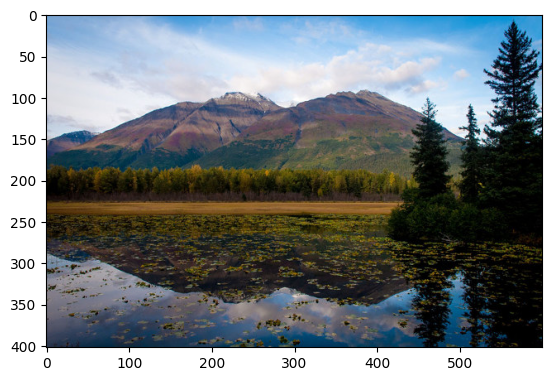

In [3]:
plt.imshow(image_dict['lake'])

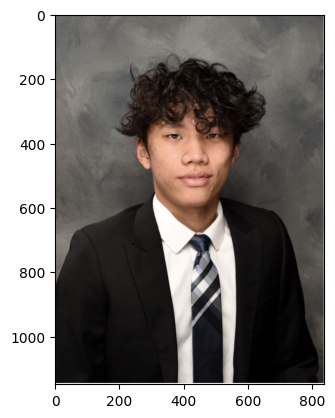

In [4]:
plt.imshow(image_dict['photo'])

In [5]:
image_dict['lake'].shape
## See below for explanation of the dimensions

(402, 600, 3)

In [6]:
image_dict['photo'].shape

(1149, 837, 3)

So one can think of a digital image as consisting of three layers (one for red (R), one for green (G), and one for blue (B)), and each layer is a matrix (here of size 402 x 600). One can also think of a 3-d matrix, where here the size of the third dimension is very small (only three) as compared to the other two sizes (402 and 600).

### Write a function to get the compressed matrix

SVD can be used to find lower rank approximations of matrices by setting (small) singular values to zero. More specifically, if $X = s_1u_1v_1^\top＋\ldots+s_du_dv_d^\top$ is the SVD of a matrix (think image), where the singular values $s_k$ are sorted by size $(s_1 \ge s_2 \ge \cdots)$, then we can truncate this sum and use ${\tilde X}_k = s_1u_1v_1^\top＋\ldots+s_ku_kv_k^\top$ with $k<d$ to approximate $X$. Note that the approximation ${\tilde X}_k$ has an SVD with $k$ (non-zero) singular values, and thus the rank of this matrix is $k$ (which is smaller than $d$). This approximation matrix is used as the compressed matrix. This indeed is a compressed matrix, because we only need to store the $k$ vectors $u_1,\ldots,u_k$, the $k$ vectors $v_1,\ldots,v_k$ and the first $k$ singular values, which are $k(1+n+m)$ values as compared to storing the entire matrix. Storing the entire matrix can be done by storing all the elements of the entire SVD, which are $d(1+n+m)$ values, or the original pixels, which are $nm$ values, depending what is smaller. (Note that if $n=m$, then all the pixels are $n^2$ values, while storing the SVD means storing $(2n+1)d \approx 2nd$ values. Thus if the rank $d$ of the matrix is (close to) $n$, then we do not gain anything when storing the SVD, but if $d$ is much less than $n$ (or when compressing the matrix with only using $k$ summands in the SVD with $k$ much less than $n$), then we can gain a lot. Of course, when compressing a matrix (image), we need to make sure that we do not loose too much information, and this is related to the size of the 'small' singular values that are being omitted when doing the compression (see 'reconstruction error' below). 

Now, we will write a function to implement this compression of the images.

In [7]:
## First, write a function to compress a matrix; this will then be used to compress an image

def compress_svd(matrix:np.ndarray, k:int) -> np.ndarray:
    
    # Compute the SVD of the input matrix
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)

    # Retain only the top k singular values and corresponding vectors
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]

    # Compute the compressed matrix
    compressed_matrix = np.dot(U_k, np.dot(S_k, Vt_k))
    
    
    return compressed_matrix

### The function compresses the images in two different ways

Each image file has three channels "red", "green" and "blue","RGB", which corresponds to image[:,:,0], image[:,:,1], and image[:,:,2]. The values in image[i,j,0], for instance, are the intensities of the red channel at location (i,j). Now, we need to write two different functions 
- "compress_show_images_reshape" to perform compression by combining the three channels together to a bigger matrix and then decomposing it back to three channels so that it can be displayed as an image again;
- "compress_show_images_separate" to perform compressions on three channels separately. 

Reconstruction error is defined as the mean squared error, i.e., the mean (average) of the squared differences between the entries in the original image tensor and the entries in the compressed image tensor. So if the image tensor has shape (I,J,3), then the sum in the recostruction error extends over all I * J * 3 squared differences.


In [8]:
def compress_show_images_reshape(image_name:str, k:int, show_image=True) -> float:
    
    image_name = image_dict[image_name]
    height, width, _ = image_name.shape

    # Reshape the image to combine the three channels
    reshaped_image = np.reshape(image_name, (height, width * 3))

    # Compress the reshaped image
    compressed_image = compress_svd(reshaped_image, k)

    # Reshape the compressed image back to the original shape
    compressed_image_reshaped = np.reshape(compressed_image, (height, width, 3))

    # Calculate the reconstruction error
    reconst_error = np.mean((image_name - compressed_image_reshaped) ** 2)

    if show_image:
        # Display the original and compressed images
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image_name)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(compressed_image_reshaped)
        plt.title(f'Compressed Image (k={k}, error={reconst_error:.4f})')

        plt.show()
    
    return reconst_error

In [9]:
def compress_show_images_separate(image_name:str, k:int, show_image=True) -> float:

    image_name = image_dict[image_name]
    compressed_image = np.zeros_like(image_name)

    # Compress each channel separately
    for channel in range(3):
        compressed_image[:, :, channel] = compress_svd(image_name[:, :, channel], k)

    # Calculate the reconstruction error
    reconst_error = np.mean((image_name - compressed_image) ** 2)

    if show_image:
        # Display the original and compressed images
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image_name)
        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(compressed_image)
        plt.title(f'Compressed Image (k={k}, error={reconst_error:.4f})')

        plt.show()    
    
    return reconst_error



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


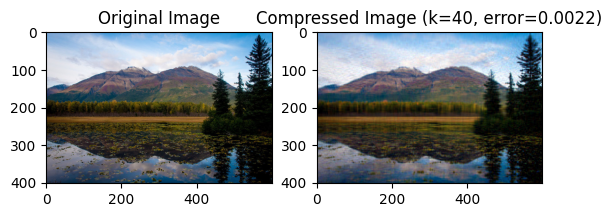

0.0021811174

In [10]:
compress_show_images_separate('lake', 40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


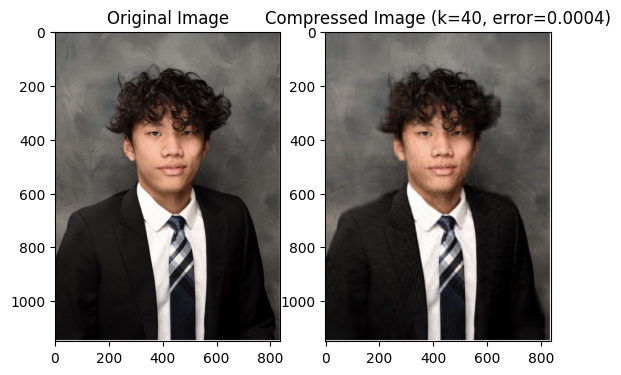

0.0004369192

In [11]:
compress_show_images_separate('photo', 40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


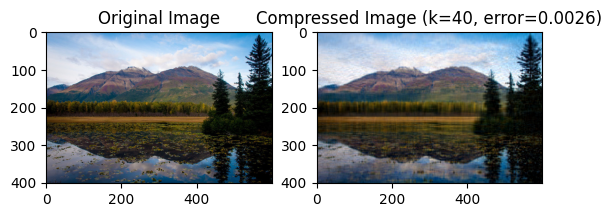

0.002594962

In [12]:
compress_show_images_reshape('lake', 40)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


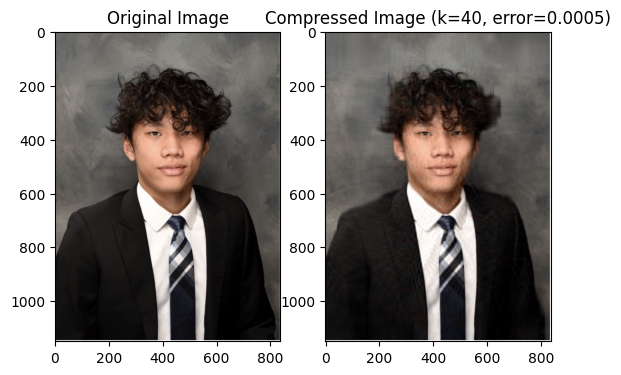

0.00046769396

In [13]:
compress_show_images_reshape('photo', 40)

### Function that plots the reconstruction errors and their differences 

Compare and visualize the reconstruction errors (see above). Recommended functions to use: matplotlib.pyplot, subplot.

In [14]:
def plot_error(image_name:str, k_min:int, k_max:int):
    
    k_values = np.arange(k_min, k_max + 1)
    errors_reshape = np.zeros_like(k_values, dtype=float)
    errors_separate = np.zeros_like(k_values, dtype=float)

    for i, k in enumerate(k_values):
        errors_reshape[i] = compress_show_images_reshape(image_name, k, show_image=False)
        errors_separate[i] = compress_show_images_separate(image_name, k, show_image=False)

    error_difference = errors_reshape - errors_separate

    plt.figure()

    # Plot the reconstruction errors using compress_show_images_reshape and compress_show_images_separate
    plt.subplot(1, 2, 1)
    plt.plot(k_values, errors_reshape, label='Reshape', color='blue')
    plt.plot(k_values, errors_separate, label='Separate', color='orange')
    plt.xlabel('k')
    plt.ylabel('Reconstruction Error')
    plt.legend()
    plt.title('Reconstruction Errors')

    # Plot the difference of the reconstruction errors for each k between k_min and k_max
    plt.subplot(1, 2, 2)
    plt.plot(k_values, error_difference, color='green')
    plt.xlabel('k')
    plt.ylabel('Error Difference')
    plt.title('Error Difference (Reshape - Separate)')

    # Adjust the horizontal spacing between subplots
    plt.subplots_adjust(wspace=0.5)

    plt.show()



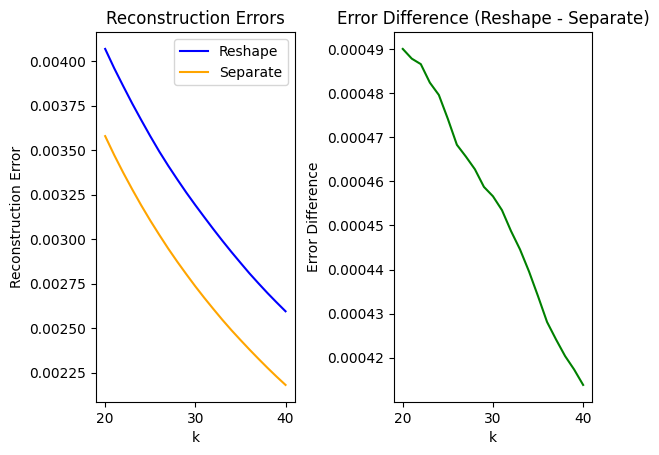

In [15]:
plot_error('lake', k_min=20, k_max=40)

it appears that the reconstruction error for the separate compression method (orange line) is consistently smaller than the reshape method (blue line). The difference in errors (green line) is not strictly monotonic but shows a general decreasing trend as k increases. This suggests that the performance gap between the two methods narrows as more singular values are used, although the separate method still performs better in terms of reconstruction error.

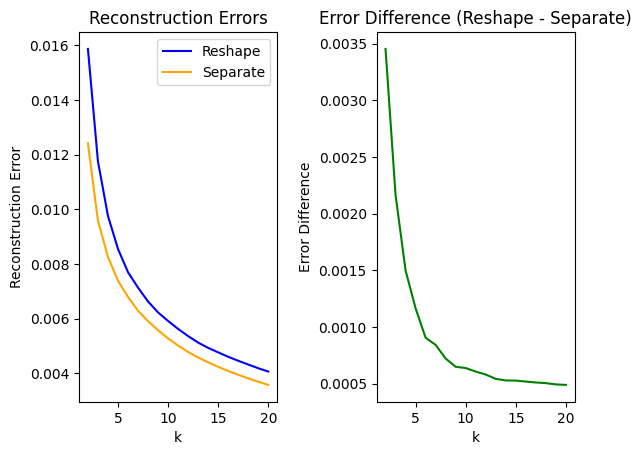

In [16]:
plot_error('lake', 2, 20)

In [17]:
[compress_show_images_separate('lake', k, False) for k in [1,5,10,20,30,40,20000]]

[0.018221032,
 0.0073899403,
 0.005279084,
 0.0035794622,
 0.0027349214,
 0.0021811174,
 2.3733579e-14]

In [18]:
[compress_show_images_reshape('lake', k, False) for k in [1,5,10,20,30,40,20000]]

[0.021424817,
 0.0085557,
 0.005917929,
 0.004069459,
 0.003191525,
 0.002594962,
 2.3821895e-14]

In [19]:
from ipywidgets import interact

In [20]:
interact(compress_show_images_reshape,image_name=['lake','photo'], k=(10,70))

interactive(children=(Dropdown(description='image_name', options=('lake', 'photo'), value='lake'), IntSlider(v…

<function __main__.compress_show_images_reshape(image_name: str, k: int, show_image=True) -> float>

## Part 2. PCA of hand-written digits

<p>Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much of the variance in the data as possible. It's particularly useful when dealing with high-dimensional data or when wanting to visualize complex datasets in a simplified manner.</p>

<h3>How PCA Works</h3>
<p>The goal of PCA is to identify the directions (called principal components) along which the variance of the data is maximized. This is done in several steps:</p>
<ol>
  <li><strong>Standardize the Data:</strong> PCA starts with the standardization of the data. Each feature should have a mean of zero and a unit variance. This is crucial because PCA is sensitive to the variances of the initial variables.</li>
  <li><strong>Compute the Covariance Matrix:</strong> Next, compute the covariance matrix of the data. The covariance matrix expresses how each variable fluctuates with respect to every other variable in the dataset.</li>
  <li><strong>Calculate Eigenvalues and Eigenvectors:</strong> From the covariance matrix, calculate the eigenvalues and the corresponding eigenvectors. Eigenvalues indicate the magnitude of variance captured by each principal component, whereas eigenvectors indicate the direction of these components.</li>
  <li><strong>Sort Eigenvalues and Eigenvectors:</strong> Eigenvalues are sorted in descending order. The corresponding eigenvectors are arranged in the same order. This step ranks the principal components in terms of their importance (variance explained).</li>
  <li><strong>Select a Subset of the Principal Components:</strong> Choose the top <em>k</em> eigenvectors (where <em>k</em> is the number of dimensions you want to keep). This selection is typically based on the cumulative explained variance ratio, which should ideally be above a certain threshold (e.g., 80-90%).</li>
  <li><strong>Transform the Data:</strong> Finally, transform the original data by projecting it onto the selected principal components. This step yields the lower-dimensional output which retains most of the significant statistical information of the original data.</li>
</ol>

<h3>Benefits of Using PCA for Dimension Reduction</h3>
<ul>
  <li><strong>Noise Reduction:</strong> PCA can help in noise reduction by removing the components with less variance, which are often considered to involve more noise.</li>
  <li><strong>Improved Visualization:</strong> Reducing dimensions to 2 or 3 makes it possible to visualize and interpret the data better.</li>
  <li><strong>Increased Efficiency:</strong> Lower dimensions mean less computational overhead and faster processing, which is critical for large datasets.</li>
  <li><strong>Feature Correlation:</strong> PCA can help discover the underlying variable correlations in the data, which might not be apparent initially.</li>
</ul>
<p>PCA is widely used in areas such as exploratory data analysis, predictive modeling, and in the preprocessing steps for other machine learning algorithms to improve accuracy and performance.</p>


The data we are going to work with are hand-writted digits data. The digits data available in sklearn consists of 1797 images of handwritten digits, each image consisting of  8×8=64  pixels. We can think of the digits to consist of 10 classes (one class for each of the digits 0 - 9). Indeed, the data set comes with labels 0-9, indicating the figure it represents ("digits.target" gives you these labels as an array), although when performaing PCA we are ignoring the labels ("unsupervised"). We only use the labels to make vizualising the results more effective. In the following code, change the value of the index to plot different images.

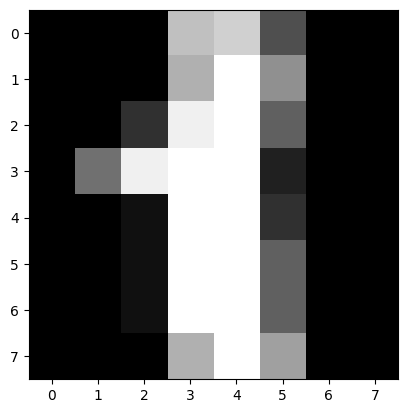

In [21]:
index = 1
digits = load_digits()
plt.imshow(digits.images[index],cmap='gray') 
target = digits.target

In [22]:
# To see the size of the data set

digits.data.shape

(1797, 64)

### Check the covariance matrix

Notice that in contrast to the first part of this project, we here have many images, and we consider each image as a data point. To this end we consider each image, i.e. each $(8 \times 8)$-matrix representing the image, as a vector (a 'stringed' matrix) of length $8 \times 8 = 64$. So our data are now 64-dimensional vectors, and we have 1797 such data points. 

The following code computes the covariance matrix of these data vectors and gets its rank. 

In [23]:
mu=digits.data.mean(axis=0)
X=digits.data
X_bar=np.repeat(mu,X.shape[0]).reshape(len(mu),-1).T
cov=np.dot( (X-X_bar).T, X-X_bar )

np.linalg.matrix_rank(cov)


61

So, in the above code, X is our $(1797 \times 64)$ data matrix, where each row is one of the images considered as a $64$-dimensional vector. X_bar is the 64-dimensional vector of averages (taken over the 1797 vectors) of each of the components of the vector, so that np.cdot(X-X_bar.T X-X_bar) is the covariance matrix of our 64-dimensional data cloud. Interpret what you have found above.

A: This information can help us understand the intrinsic dimensionality of the data and can guide us in choosing an appropriate number of principal components when applying PCA.

### Now use PCA to find a 2-dim subspace to reconstruct the digits 

Here we first perform dimension reduction of our 64-dimensional data. The goal is to reduce the dimension to 2, and we want to use PCA for that. Then we 'reconstruct' the data by finding the approximation to the original image (or vector in 64-dimensional space).  To this end, we find the first two principal components (i.e. the first two principal component loading vectors) and use them together with the correponding principal component scores to reconstruct the digits image. Formally, if $w_1,\ldots,w_p$ denote the principal component loading vectors, or the principal axis (recall that the form a basis of unit eigenvectors of the covariance matrix), then each $p$-dimensional data vector $X$ can be written as

$$X = \sum_{j=1}^p w_j Z_{j}$$

where $Z_{j} = \langle w_j,X \rangle$ is the projection score of $X$ when projected on $w_j$. The 'reconstruction' $X^{(k)}_{\rm inv}$ of $X$ based on $k \le p$ principal component axis is

$$X^{(k)}_{\rm inv} = \sum_{j=1}^k w_j Z_{j}.$$

The index 'inv' stands for *inverse* (so we try to approximate the inverse map: from the principal axes (loadings) and principal component scores (or projection scores) back to the data). We will just use the corresponding recommended function that comes with the PCA function from scikit-learn (sklearn), which automatically handles the computation of the covariance matrix, as well as the derivation of the eigenvectors and eigenvalues. 


In [24]:
## X_new is a list of lists which contains the first two PC for each digit image
## X_inv is the reconstructed digit image with the same shape as X

from sklearn.preprocessing import StandardScaler

# Standardize the data
X = digits.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components and set random_state to 12
pca = PCA(n_components=2, random_state=12)
X_new = pca.fit_transform(X_scaled)

# Reconstruct the images using the first two principal components
X_inv = pca.inverse_transform(X_new)

# Rescale the reconstructed data back to the original scale
X_reconstructed = scaler.inverse_transform(X_inv)

# Reshape the reconstructed data to have the original image shape
X_reconstructed_images = X_reconstructed.reshape((1797, 8, 8))



### Plot each digit (elements in X_new) with different color labels

Make a scatter plot of the first two pc scores and mark each point with different color that corresponds to its label, 0~9.

Recommended functions: plt.scatter

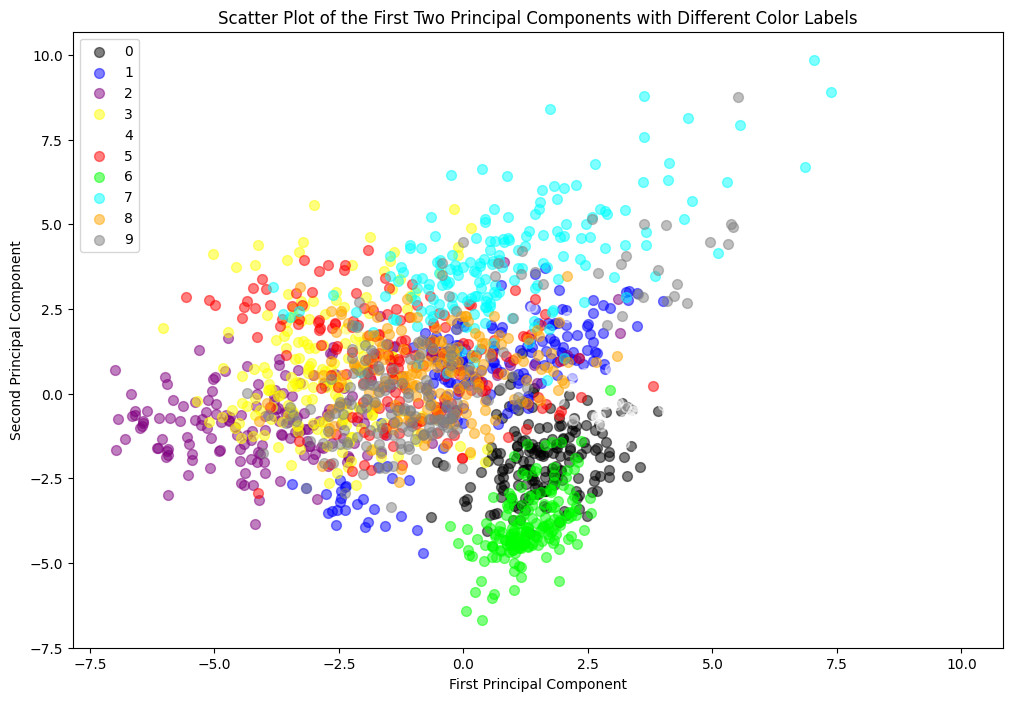

In [25]:
# Create a scatter plot of the first two principal component scores
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.figure(figsize=(12, 8))
for i, label in enumerate(labels):
    plt.scatter(X_new[target == label, 0], X_new[target == label, 1], c=colors[i], label=label, alpha=0.5, s=50)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('Scatter Plot of the First Two Principal Components with Different Color Labels')
plt.show()

### Function that does a side-by-side plot of the original digit and the reconstructed digit

The left subplot is the original digit, the right subplot is the reconstructed digit. 'index' is the index of the image we want to reconstruct and plot.

In [26]:
def plot_digits(index:int):
    """
    the left part is the compressed digit, the right part is the original digit
    """
    # Load the dataset
    digits = load_digits()
    X = digits.data
    # target = digits.target

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA with 2 components and set random_state to 12
    pca = PCA(n_components=2, random_state=12)
    X_new = pca.fit_transform(X_scaled)

    # Reconstruct the images using the first two principal components
    X_inv = pca.inverse_transform(X_new)

    # Rescale the reconstructed data back to the original scale
    X_reconstructed = scaler.inverse_transform(X_inv)

    # Reshape the reconstructed data to have the original image shape
    X_reconstructed_images = X_reconstructed.reshape((1797, 8, 8))

    # Plot the original and reconstructed digits side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.imshow(digits.images[index], cmap='gray')
    ax1.set_title('Original Digit')
    ax1.axis('off')

    ax2.imshow(X_reconstructed_images[index], cmap='gray')
    ax2.set_title('Reconstructed Digit')
    ax2.axis('off')

    plt.show()

In [27]:
X_inv[0]

array([ 3.72139349e-17, -3.93718582e-01, -6.04067099e-01, -4.01974529e-01,
       -1.00627846e-01, -2.43481432e-01, -1.37917739e-01, -1.91845904e-02,
       -6.54578648e-02, -4.96365226e-01, -4.52489883e-01,  2.94695501e-01,
       -1.23973441e-01, -2.78471113e-01, -9.40379640e-02,  4.68236403e-02,
       -2.49590890e-02, -2.42478740e-01,  2.33748225e-01,  3.15485602e-01,
       -3.57021160e-01, -1.07284936e-01,  1.88292566e-01,  1.22313269e-01,
        1.12715176e-02,  2.85341196e-01,  4.67778552e-01, -1.77307197e-01,
       -4.32154917e-01,  1.13942803e-01,  2.92193381e-01,  7.54021268e-02,
        0.00000000e+00,  5.69635870e-01,  5.50451093e-01, -4.64726323e-02,
       -8.57402684e-02,  3.09559128e-01,  3.23432409e-01,  0.00000000e+00,
        1.29026871e-01,  4.57855035e-01,  4.74443661e-01,  8.09228773e-02,
        7.01562555e-02,  2.91856918e-01,  1.95331213e-01,  7.94718044e-02,
        6.47469223e-02, -4.45607159e-02, -3.39172435e-02, -2.31804459e-02,
        9.18100454e-02,  

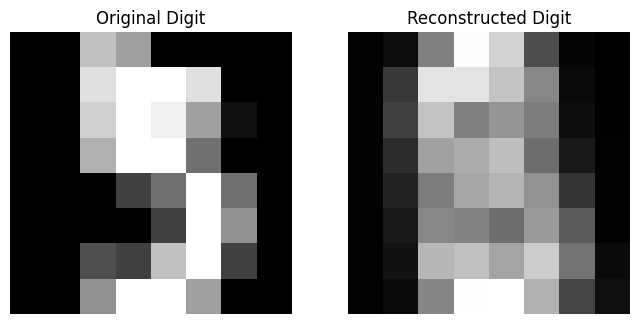

In [46]:
plot_digits(5)

The digits are blurry because we aggresively reduce the dimension to 2 dimensions only, which leaves out a lot of information. In realistic practice, we will include more dimensions in our PCA. 